# View Graph For Indoor Navigation
## Abstract
Recently, several indoor graph models have been proposed to capture topological and geometric information, and generate navigation graphs and route descriptions. Varied modelling approaches in these studies lead to incompatible graph structures that are only suitable for specific use-cases. The inconsistency in the indoor models sources from the differences in modelling approaches that are either focused on capturing the <em>survey</em> or the <em>route</em> information. For example, the topological and geometric models capture survey information of an indoor environment, while navigation graph and route description models mainly store route information. In this study, we propose a new concept, based on <em>views</em>, to capture survey and route information of an indoor environment in a unified manner. We define views as directed line of sights in which the visible spatial objects and their relationships are the same along the view. Using views, moving in the space (route information) can be captured as going from one view to another, and survey information can be attached to each view based on its visibility situation.

## Hypothesis and Research Questions
This study hypothesizes that using the concept of <em>view</em> both survey and route knowledge of an indoor environment can be captured. To test the hypothesis, we will address the following research questions:
* How can views be extracted from geometric information (e.g., floor plans)?
* How can view graphs be constructed to capture <em>movement</em> and <em>turns</em> from one view to another?
* Can route descriptions and navigation graphs be generated from the view graph? By this way we can prove that route knowledge of an indoor environment can be captured by views.
* Can spatial relationships of indoor objects be extracted from the view graph? By this way we can prove that survey knowledge of an indoor environment can be captured by views.

## Definitions
* <b>Indoor Environment</b>: An indoor environment is conceptualized as a set of <em>containers</em> (i.e., navigable spaces) that are connected through <em>gateways</em>.
* <b>Container</b>: A container is a navigable space (e.g., a corridor or a room) that people can enter or exit using gateways. Containers may contain external landmarks that can be used for guidance purposes.
* <b>Gateway</b>: Gateways are either on the boundary of containers (connect a container to another), or inside the containers (i.e., decision points) where people can make a decision on how to move further inside the container.
* <b>Landmark</b>: Landmarks are external objects (people do not enter within them) that have significance for routing and guidance (e.g., signs).

## Method
1. Decomposing each container into visibility regions
2. Generating views:
    1. <b>inside a region</b>: If one or more gateways are inside the decomposed region a view is constructed from the region centroid to the gateway(s) and vice versa;
    2. <b>from a region to another region</b>: For adjacent regions, views are constructed to move from one region to its neighbours;
    3. <b>from a region to gateway(s)</b>: If a gateway is visible from a region (based on the region visibility signature, a view is constructed from the region centroid to its visible gateway(s);
3. Calculating spatial relationships for each view including topological, directional and order relationships that visible for the agent;
4. Decomposing region-to-gateway views to sequences of views if the visibility of gateways and landmarks changes across the views;
5. Generating a directed dual graph for views in which the nodes are views and edges are connection between views:
    * If the end of one view is the start another view, these views are connected through <em>movement</em>;
    * If the start of one view is the start of another view, these views are connected through <em>turn</em>
6. Linking the view graphs for containers based on the gateways that connects them to generate the view graph for the whole indoor environment -- i.e., views incident to gateways in one container will be linked to views that starts from the gateways in the other containers.

Finally, we demonstrate how the view graph can be used to (1) generate navigation graph, (2) extract spatial relationships, and (3) generate route descriptions.

## Environment
### Test Environment (Hypothetical Floor Plan)
![title](imgs_notebook/hypo_map.png)
### Real World Environment (Melbourne Connect Level 5)
![title](imgs_notebook/mc_map.png)

## References
* Amoozandeh K, Winter S, Tomko M. Space decomposition based on visible objects in an indoor environment. Environment and Planning B: Urban Analytics and City Science. 2021 Aug 11:23998083211037347.
* Becker T, Nagel C, Kolbe TH. A multilayered space-event model for navigation in indoor spaces. In3D geo-information sciences 2009 (pp. 61-77). Springer, Berlin, Heidelberg.
* Liu L, Zlatanova S. A "door-to-door" path-finding approach for indoor navigation. Proceedings Gi4DM 2011: GeoInformation for Disaster Management, Antalya, Turkey, 3-8 May 2011. 2011.
* Mortari F, Zlatanova S, Liu L, Clementini E. Improved geometric network model (IGNM): A novel approach for deriving connectivity graphs for indoor navigation. ISPRS Annals of Photogrammetry, Remote Sensing & Spatial Information Sciences. 2014 Apr 23;2(4).
* Pang Y, Zhou L, Lin B, Lv G, Zhang C. Generation of navigation networks for corridor spaces based on indoor visibility map. International Journal of Geographical Information Science. 2020 Jan 2;34(1):177-201.
* Werner S, Krieg-Brückner B, Mallot HA, Schweizer K, Freksa C. Spatial cognition: The role of landmark, route, and survey knowledge in human and robot navigation. In Informatik’97 Informatik als Innovationsmotor 1997 (pp. 41-50). Springer, Berlin, Heidelberg.
* Yang L, Worboys M. Generation of navigation graphs for indoor space. International Journal of Geographical Information Science. 2015 Oct 3;29(10):1737-56.
* Zhou Z, Weibel R, Richter KF, Huang H. HiVG: A hierarchical indoor visibility-based graph for navigation guidance in multi-storey buildings. Computers, Environment and Urban Systems. 2022 Apr 1;93:101751.


## Creating View Graph

### Loading classes

In [1]:
from Container import Container
from Isovist import Isovist
from Plotter import Plotter
from Utility import Utility
from ViewGraph import ViewGraph
from Environment import IndoorEnvironment

### Loading environment from GeoJSON files

In [2]:
# test environment
address = 'envs/hypo/'
polygon_files = ['hypo_env.geojson']
holes_files = ['hypo_holes.geojson']
doors_files = ['hypo_doors.geojson']
dpoints_files = ['hypo_dpoints.geojson']
landmarks_files = ['hypo_landmarks.geojson']

# create an indoor environment
ie = IndoorEnvironment(address, polygon_files, holes_files, doors_files, dpoints_files, landmarks_files)

environment files -- count is valid
reading GeoJSON files (boundary, holes, doors and decision points)


### Decomposing regions into isovists, and create view graph


In [3]:
# create view graph
vg, isovist_object = ie.cviewgraph(0)

calculating the visibility signatures...
calculating adjacency matrix for regions
finding regions that contains doors/gateways and decision points
decompose views
constructing view graph for regions
calculating all spatial relationships visible in each view
Adding actions to views (nodes)
Adding actions to view relations (edges)


## Generate Route Instructions

### Shortest path calculation in indoor environment

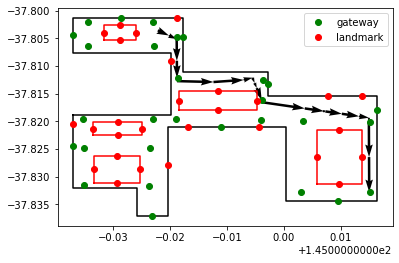

<Figure size 432x288 with 0 Axes>

In [4]:
# calculate shortest path
vp, pv= vg.shortest_path_regions(38, 56)
plotter = Plotter()
plotter.add_isovist(isovist_object)
plotter.add_views(pv)
plotter.show()
plotter.close()

### Generate route instructions

In [5]:
# generate verbal description
instructions = vg.generate_route_description(vp)

************Verbal Description**************
	Head towards gateway 28
	Pass landmark 17 and turn right
	Pass landmark 18 and turn left
	Follow gateway 14 on the front and turn right
	Follow gateway 27 on the front and turn left
	Pass landmark 12 and turn right
	Pass gateway 23 and move forward until you reach the destination
********************END*********************



## Derive Door-to-Door Visibility Graph


<b>Example:</b>
![title](imgs_notebook/door-to-door.png)
(source: Liu and Zlatanova, 2011)

<b>Node:</b>
* Doors (could be also gateways)

<b>Edge:</b>
* Direct visibility

<b>References:</b>
* Liu L, Zlatanova S. A "door-to-door" path-finding approach for indoor navigation. Proceedings Gi4DM 2011: GeoInformation for Disaster Management, Antalya, Turkey, 3-8 May 2011. 2011.
* Mortari F, Zlatanova S, Liu L, Clementini E. Improved geometric network model (IGNM): A novel approach for deriving connectivity graphs for indoor navigation. ISPRS Annals of Photogrammetry, Remote Sensing & Spatial Information Sciences. 2014 Apr 23;2(4).

### Generate door-to-door visibility graph (for doors and decision points)

generate door-to-door graph, only_doors False from view graph


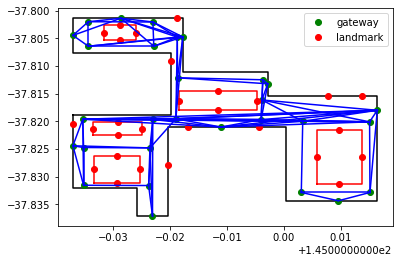

<Figure size 432x288 with 0 Axes>

In [6]:
# derive door-to-door visibility graph (doors and decision points)
connected, dtd_graph = vg.generate_door_to_door_graph(isovist_object)
plotter = Plotter()
plotter.add_isovist(isovist_object)
plotter.add_points_lines(connected)
plotter.show()
plotter.close()

In [7]:
from pyvis.network import Network

nt2 = Network(width='1000px', height='600px', directed=False, notebook=True)
nt2.from_nx(dtd_graph, show_edge_weights=False)
nt2.options.physics.use_repulsion({'node_distance': 185, 'central_gravity': 0.2, 'spring_length': 200,
                                    'spring_strength': 0.05, 'damping': 0.09})

nt2.show('d-t-d-all.html')

### Generate door-to-door visibility graph (only for doors)

generate door-to-door graph, only_doors True from view graph


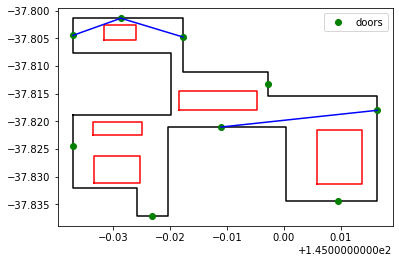

<Figure size 432x288 with 0 Axes>

In [8]:
connected2, dtd_graph2 = vg.generate_door_to_door_graph(isovist_object, only_doors=True)
plotter = Plotter()
plotter.add_poly(isovist_object.space_x, isovist_object.space_y)
plotter.add_holes(isovist_object.holes_x, isovist_object.holes_y)
plotter.add_points(isovist_object.door_points[:isovist_object.door_idx], 'doors')
plotter.add_points_lines(connected2)
plotter.show()
plotter.close()

In [9]:
nt2 = Network(width='1000px', height='600px', directed=False, notebook=True)
nt2.from_nx(dtd_graph2, show_edge_weights=False)
nt2.options.physics.use_repulsion({'node_distance': 185, 'central_gravity': 0.2, 'spring_length': 200,
                                    'spring_strength': 0.05, 'damping': 0.09})

nt2.show('d-t-d-doors.html')

## Derive navigation graph

<b>Example:</b>
![title](imgs_notebook/navigation-graph.png)
(source: Yang & Worboys, 2015)


<b>Reference</b>
* Yang L, Worboys M. Generation of navigation graphs for indoor space. International Journal of Geographical Information Science. 2015 Oct 3;29(10):1737-56.
* Pang Y, Zhou L, Lin B, Lv G, Zhang C. Generation of navigation networks for corridor spaces based on indoor visibility map. International Journal of Geographical Information Science. 2020 Jan 2;34(1):177-201.

In [10]:
# derive all shortest path visibility graph and spanning tree
vps, pvs, st_vps, st_pvs, nvgraph = vg.generate_navigation_graph(isovist_object, False)
plotter = Plotter()
plotter.add_isovist(isovist_object)

# all path for gateways (doors+decision points)
for pv in pvs:
    plotter.add_views(pv)
plotter.show()

derive navigation graph using spanning tree from viewgraph


TypeError: 'AtlasView' object does not support item assignment

In [ ]:
# minimum spanning tree of shortest path fully connect graph
plotter.refresh()
for pv in st_pvs:
    plotter.add_views(pv)
plotter.show()

In [ ]:
# navigation graph
plotter.refresh()
for pv in st_pvs:
    plotter.add_points_lines(pv, is_vis=False)
plotter.show()

In [ ]:
# todo: generate navigation 'graph' for gateways + doors

## Derive place graph from view graph

<b>Example:</b>

![title](imgs_notebook/placegraph.png)
(Source: Chen et. al. 2018)

Nodes:
* place:
* reference:
* n-plet:
* spatial relationship:


Edges:
* locatum:
* relatum:
* map:
* referred by:
* has reference direction:

<b>Reference</b>: Chen H, Vasardani M, Winter S, Tomko M. A graph database model for knowledge extracted from place descriptions. ISPRS International Journal of Geo-Information. 2018 Jun;7(6):221.


In [ ]:
place_graph = vg.generate_place_graph(isovist_object)

### Visualize a part of place graph (center: landmark 2, radius=2)

In [ ]:
pg_l2_2 = Utility.create_subgraph(place_graph, 'landmark 2', 2)

nt2 = Network(width='1000px', height='600px', directed=True, notebook=True)
nt2.from_nx(pg_l2_2, show_edge_weights=False)
nt2.options.physics.use_repulsion({'node_distance': 185, 'central_gravity': 0.2, 'spring_length': 200,
                                    'spring_strength': 0.05, 'damping': 0.09})

nt2.show('placegraph_l2_2.html')

In [ ]:
plotter = Plotter()
plotter.add_poly(isovist_object.space_x, isovist_object.space_y)
plotter.add_holes(isovist_object.holes_x, isovist_object.holes_y)
ls = []
gs = []
for n in list(pg_l2_2.nodes):
    if 'landmark ' in n:
        lid = int(n.replace('landmark ', ''))
        ls.append(isovist_object.landmarks_points[lid])
    elif 'gateway ' in n:
        gid = int(n.replace('gateway ', ''))
        gs.append(isovist_object.door_points[gid])
plotter.add_points(ls, label='graph (landmarks)', color='ko')
plotter.add_points(gs, label='graph (gateways)', color='mo')
plotter.show()

### Visualize a part of place graph (center: gateway 7, radius=2)

In [ ]:
pg_g7_2 = Utility.create_subgraph(place_graph, 'gateway 7', 2)

nt2 = Network(width='1000px', height='600px', directed=True, notebook=True)
nt2.from_nx(pg_g7_2, show_edge_weights=False)
nt2.options.physics.use_repulsion({'node_distance': 185, 'central_gravity': 0.2, 'spring_length': 200,
                                    'spring_strength': 0.05, 'damping': 0.09})

nt2.show('placegraph_g7_2.html')

In [ ]:
plotter = Plotter()
plotter.add_poly(isovist_object.space_x, isovist_object.space_y)
plotter.add_holes(isovist_object.holes_x, isovist_object.holes_y)
ls = []
gs = []
for n in list(pg_g7_2.nodes):
    if 'landmark ' in n:
        lid = int(n.replace('landmark ', ''))
        ls.append(isovist_object.landmarks_points[lid])
    elif 'gateway ' in n:
        gid = int(n.replace('gateway ', ''))
        gs.append(isovist_object.door_points[gid])
plotter.add_points(ls, label='graph (landmarks)', color='ko')
plotter.add_points(gs, label='graph (gateways)', color='mo')
plotter.show()